In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [6]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [38]:
sample_data = data['text'][:1000]

In [39]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [41]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [42]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [ 0.01299886  0.04251749  0.11877282 -0.00827642 -0.04026588  0.03150424
 -0.08096388  0.12271498 -0.02887888  0.05298553  0.17644078 -0.05075007
  0.10470906  0.04614621  0.03400775  0.00397619  0.1614637   0.03974317
 -0.10508934 -0.07726578]
[('476', 0.8726003170013428), ('507', 0.8047909736633301), ('931', 0.7686789631843567), ('341', 0.7625806331634521), ('614', 0.7363796234130859), ('537', 0.7252777218818665), ('982', 0.7210085391998291), ('854', 0.6975716352462769), ('665', 0.6916233897209167), ('122', 0.6787211298942566)]
[-0.34975618  3.2333288   3.2041981   4.9252067   4.8313713   1.0912018
 -3.4708729  -2.8507674  -0.99659544  1.361278    6.9968514  -3.987745
 -2.014945    3.9906707   3.3934042  -3.2849405   6.9082847  -2.7610843
 -2.4692876  -5.3791475 ]


In [43]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [45]:
list(doc_vectors.values())[0]

array([ 0.11696315, -0.01066079,  0.36564288,  0.2787324 , -0.12922913,
       -0.08311441,  0.1343485 ,  0.47106716, -0.36228734,  0.04793511,
        0.34122854, -0.05899245,  0.372451  ,  0.15442316,  0.26483423,
        0.09095497,  0.5767511 , -0.12104566, -0.36036813, -0.5578048 ],
      dtype=float32)

In [36]:
#perform k-means clustering on embedded documents

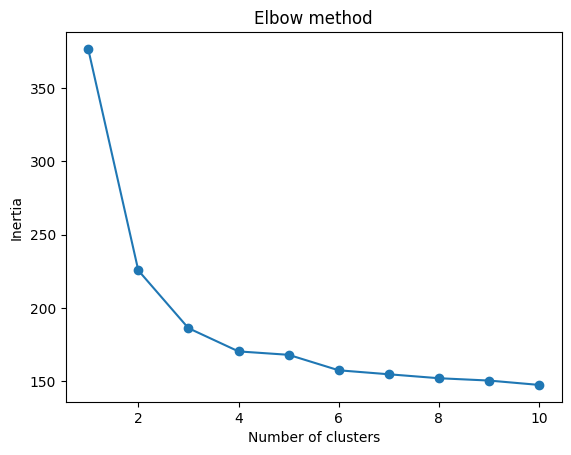

In [46]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [48]:
num_clusters = 3

In [49]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [53]:
labeled_data = zip(sample_data,kmeans.labels_); list(labeled_data)

[('RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate',
  1),
 ("RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…",
  1),
 ('RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.',
  0),
 ("RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …",
  2),
 ('RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…',
  1),
 ('RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews',
  1),
 ('RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…',
  2),
 ('Going on #MSNBC Live with @T

In [54]:
#find centroid and compute document closest to centroid